In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
'''from zipfile import ZipFile
fname = "data/suicides-in-india.zip"

with ZipFile(fname,'r') as zip:
    zip.printdir()
    zip.extractall()
    print("extracted data")
'''

'from zipfile import ZipFile\nfname = "data/suicides-in-india.zip"\n\nwith ZipFile(fname,\'r\') as zip:\n    zip.printdir()\n    zip.extractall()\n    print("extracted data")\n'

In [2]:
data = pd.read_csv("data/Suicides in India 2001-2012.csv")

In [3]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [28]:
eduDf = data[data['Type_code']=='Education_Status']
causesDf = data[data['Type_code']=='Causes']
meansDf = data[data['Type_code']=='Means_adopted']
profDf = data[data['Type_code']=='Professional_Profile']
socialDf = data[data['Type_code']=='Social_Status']

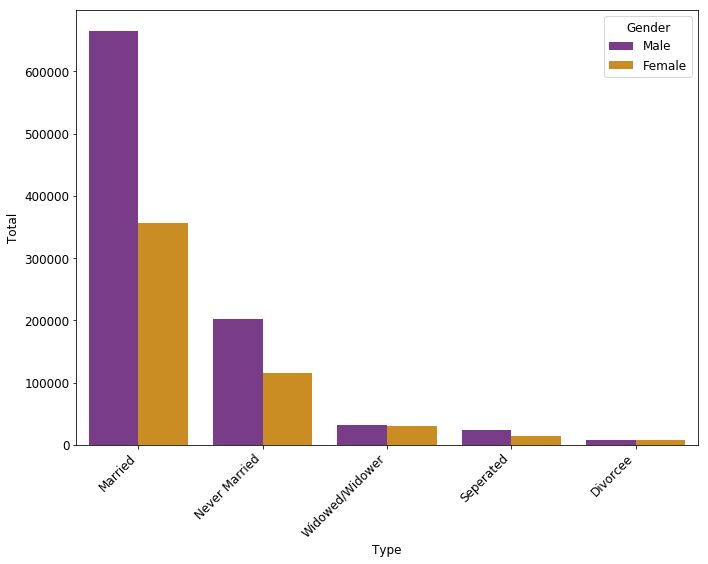

In [29]:
plt.figure(figsize=(10,8))
socialDf = socialDf[['Type','Gender','Total']]
socialSort = socialDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=socialSort,hue='Gender',palette='CMRmap')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

In [30]:
socialDf.head()

,Type,Gender,Total
552,Married,Female,38
553,Seperated,Female,0
554,Widowed/Widower,Female,0
555,Divorcee,Female,0
556,Never Married,Female,12


In [31]:
socialSort

,Type,Gender,Total
3,Married,Male,665007
2,Married,Female,356767
5,Never Married,Male,202841
4,Never Married,Female,115460
9,Widowed/Widower,Male,32184
8,Widowed/Widower,Female,29929
7,Seperated,Male,24306
6,Seperated,Female,14165
0,Divorcee,Female,7692
1,Divorcee,Male,7580


In [32]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.monospace'] = ['Andale Mono']
rcParams['font.size']=14

d:\kaggle_comp\env\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
d:\kaggle_comp\env\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


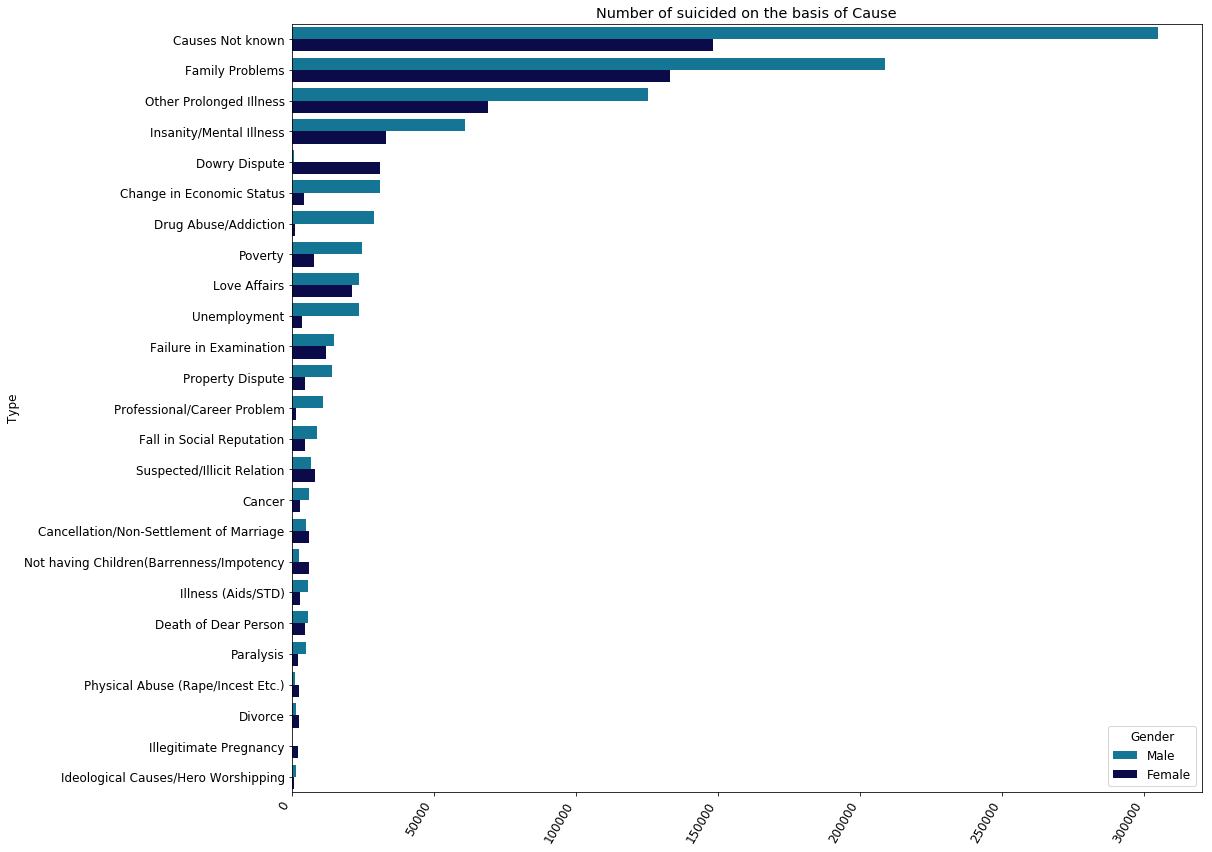

In [72]:
causesDf.is_copy = False
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic Status','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Other Causes (Please Specity)','Type'] = 'Causes Not known'
causesDf.loc[causesDf['Type']=='Not having Children (Barrenness/Impotency','Type'] = 'Not having Children(Barrenness/Impotency'
plt.figure(figsize=(17,12))
causesDf = causesDf[['Type','Gender','Total']]
causesSort = causesDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Total',y='Type',data=causesSort,hue='Gender',palette='ocean_r')
plt.title("Number of suicided on the basis of Cause")
plt.xticks(rotation=60,ha='right')
plt.xlabel("")
plt.tight_layout()
plt.savefig("charts/suicide_cause.png")

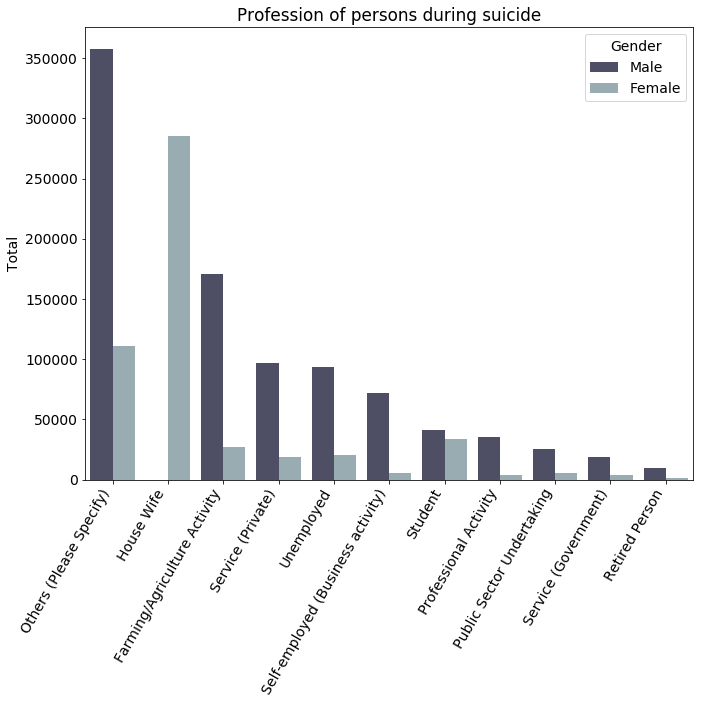

In [66]:
plt.figure(figsize=(10,10))
profDf = profDf[['Type','Gender','Total']]
profSort = profDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=profSort,hue='Gender',palette='bone')
plt.xticks(rotation=60,ha='right')
plt.title("Profession of persons during suicide")
plt.xlabel("")
plt.tight_layout()
plt.savefig("charts/profession.jpg")

    Year   Total
0   2001  108506
1   2002  110417
2   2003  110851
3   2004  113697
4   2005  113914
5   2006  118112
6   2007  122637
7   2008  125017
8   2009  127151
9   2010  134599
10  2011  135585
11  2012  135445


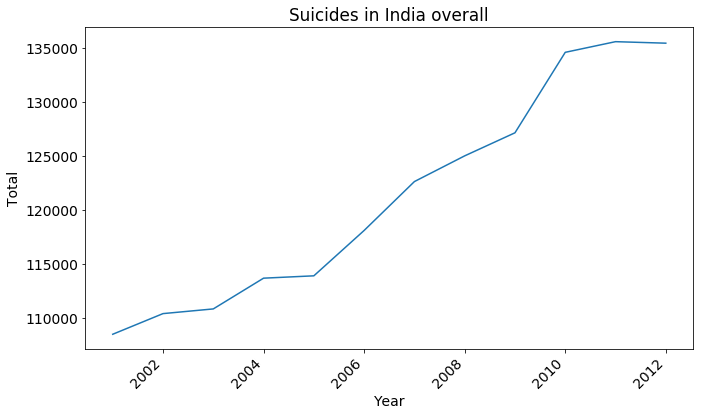

In [79]:
indiaOverall = data[(data['Type_code']=='Education_Status') & (data['State']=='Total (All India)')]
overall = indiaOverall.groupby(['Year'],as_index=False).sum()
print(overall)
plt.figure(figsize=(10,6))
plt.xticks(rotation=45,ha='right')
sns.lineplot(x='Year',y='Total',data=overall,palette='viridis',markers=True).set_title('Suicides in India overall')
plt.tight_layout()
plt.savefig("charts/overall_suicide_rate.jpg")

In [3]:
data.replace('A & N Islands', 'A & N Islands (Ut)', inplace=True)
data.replace('Chandigarh', 'Chandigarh (Ut)', inplace=True)
data.replace('D & N Haveli', 'D & N Haveli (Ut)', inplace=True)
data.replace('Daman & Diu', 'Daman & Diu (Ut)', inplace=True)
data.replace('Lakshadweep', 'Lakshadweep (Ut)', inplace=True)
data.replace('Puducherry', 'Puducherry (Ut)', inplace=True)

data.replace('Bankruptcy or Sudden change in Economic', 'Bankruptcy or Sudden change in Economic Status', inplace=True)
data.replace('By Other means (please specify)', 'By Other means', inplace=True)
data.replace('Not having Children(Barrenness/Impotency', 'Not having Children (Barrenness/Impotency', inplace=True)

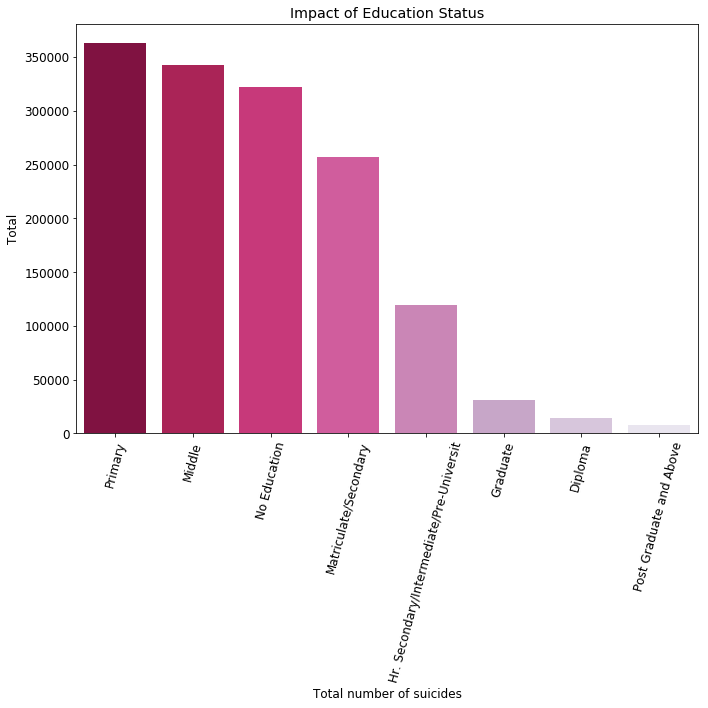

In [48]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.monospace'] = ['Andale Mono']
rcParams['font.size']=12
data1 = data.loc[(data.Type_code == 'Education_Status')].groupby(['Type',])['Total'].sum().reset_index().sort_values('Total',ascending=False).head(60)
data1.set_index(['Type',])
data1=data1.set_index(['Type',])
#sns.set_style('white')
plt.subplots(figsize=(10,10))
g = sns.barplot(y='Total',x=data1.index,data=data1,palette="PuRd_r",).set_title('Impact of Education Status')
plt.xticks(rotation=75)
plt.xlabel('Total number of suicides')
plt.tight_layout()
plt.savefig("charts/impact of education.jpg")

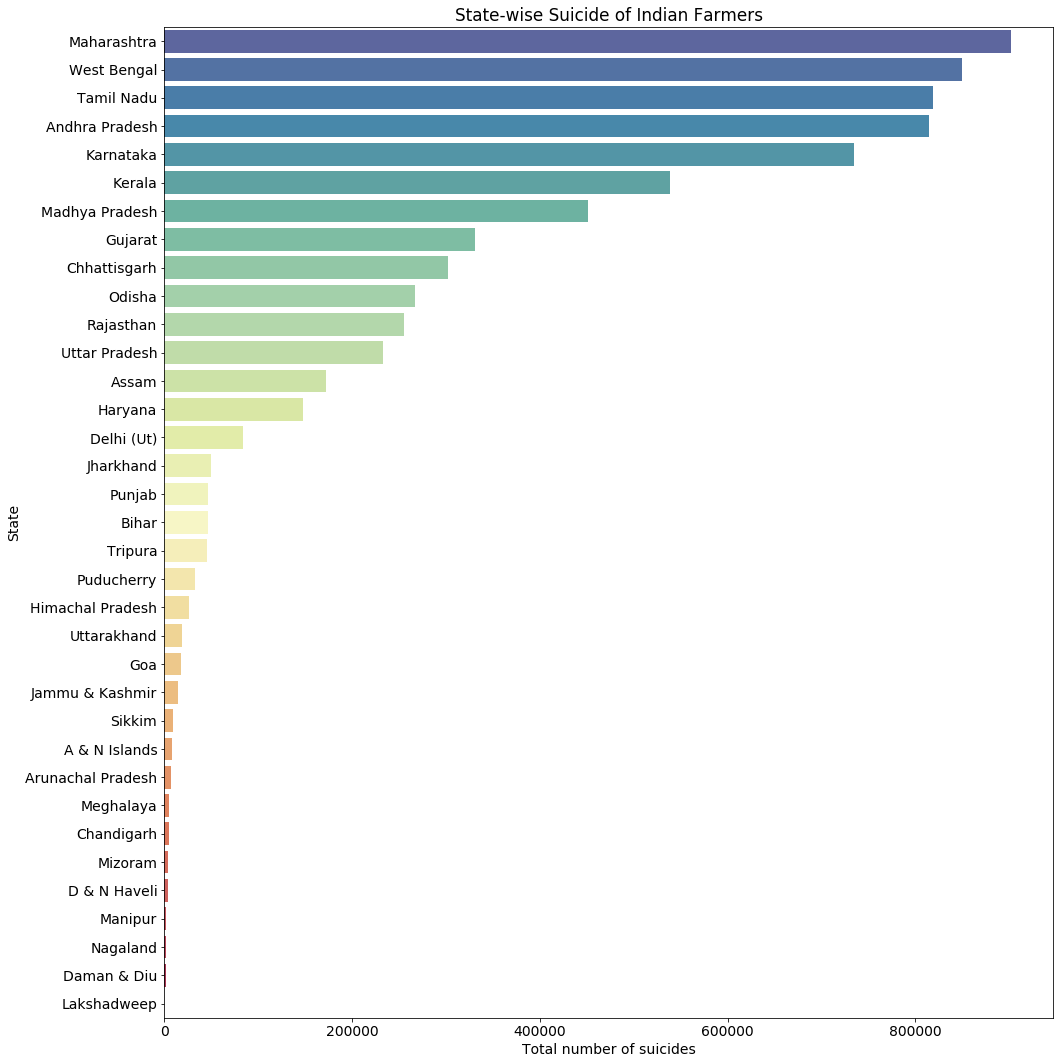

In [24]:
data = data.drop(data.loc[data.State.str.contains('Total ')].index)
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.monospace'] = ['Andale Mono']
rcParams['font.size']=14
data1 = data.groupby(['State',])['Total'].sum().reset_index().sort_values('Total',ascending=False)
data1.set_index(['State',])
data1=data1.set_index(['State',])
plt.subplots(figsize=(15,15))
g = sns.barplot(y=data1.index,x='Total',data=data1,palette="Spectral_r").set_title('State-wise Suicide of Indian Farmers')
plt.xlabel('Total number of suicides')
plt.tight_layout()
plt.savefig("charts/state_wise_suicide_farmers.jpg")